<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_MOIC_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## Importing the dataset







In [37]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [38]:
dataset['MOIC']

0         NaN
1         NaN
2         NaN
3      16.44x
4         NaN
        ...  
300       NaN
301       NaN
302       NaN
303    55.20x
304    55.20x
Name: MOIC, Length: 305, dtype: object

Filling missing values of Target column MOIC

In [39]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['MOIC']= dataset['MOIC'].str.replace("x","") # removing $ from MOIC
dataset['MOIC']= dataset['MOIC'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'MOIC'] = dataset.loc[:,'MOIC'].astype(float) # converting MOIC to float from string

dataset=dataset.drop(columns=['Exit Size (millions)','Total VC Capital Raised ($M)***'])


In [40]:
dataset.dropna(subset = ["MOIC"], inplace=True) # Drop rows with no values from Target column

In [41]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/Cash Flow,108,100.000000
Implied EV/EBIT,108,100.000000
Deal Type 3,108,100.000000
Debt Type 3,108,100.000000
Implied EV,108,100.000000
...,...,...
Deal Size Status,9,8.333333
CEO PBId,5,4.629630
Raised to Date,4,3.703704
Post Value (millions),4,3.703704


Drop Column which has missing values more than 5%

---



In [42]:
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 5,'index'])
dataset = dataset.drop(over30, axis = 1)

In [43]:
dataset

,Company PBID,Exit Date,Post Value (millions),Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,Deal No.,Deal ID.1,Deal Date,Raised to Date,Deal Type,Deal Class,Deal Status,Business Status,Financing Status,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company Country,Year Founded
3,81857-08,3/18/19,$166.00,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,1,46035-10T,19-Feb-2015,10.10,Early Stage VC,Venture Capital,Completed,Generating Revenue,Venture Capital-Backed,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,United States,2013.0
17,157322-08,12/23/19,$144.10,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,69003-46T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,1,69003-46T,09-Sep-2016,3.30,Seed Round,Venture Capital,Completed,Stealth,Venture Capital-Backed,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,United States,2015.0
18,157322-08,12/23/19,$144.10,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,87814-00T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,2,87814-00T,18-Apr-2017,17.80,Early Stage VC,Venture Capital,Completed,Generating Revenue,Venture Capital-Backed,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,United States,2015.0
19,157322-08,12/23/19,$144.10,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,115963-30T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,200154-88P,3,115963-30T,20-Dec-2018,37.80,Early Stage VC,Venture Capital,Completed,Generating Revenue,Venture Capital-Backed,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,United States,2015.0
21,52228-63,1/24/17,"$3,258.00",Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,United States,60089-32T,52228-63,Information Technology,Software,Business/Productivity Software,"Automation/Workflow Software, Business/Product...","CloudTech & DevOps, SaaS, TMT","application intelligence platform, application...",Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...",39040-75P,7,60089-32T,01-Dec-2015,335.00,Later Stage VC,Venture Capital,Completed,Generating Revenue,Venture Capital-Backed,US Dollars (USD),"San Francisco, CA",Americas,North America,San Francisco,United States,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [44]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',		'Company Country'])




In [45]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Exit Date','Post Value (millions)','Native Currency of Deal','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Class','Deal Status','CEO PBId'])





In [46]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Raised to Date,Deal Type,Business Status,Financing Status,Year Founded
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,United States,Formerly VC-backed,Generating Revenue,Venture Capital,10.10,Early Stage VC,Generating Revenue,Venture Capital-Backed,2013.0
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Generating Revenue,Venture Capital,3.30,Seed Round,Stealth,Venture Capital-Backed,2015.0
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Generating Revenue,Venture Capital,17.80,Early Stage VC,Generating Revenue,Venture Capital-Backed,2015.0
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Generating Revenue,Venture Capital,37.80,Early Stage VC,Generating Revenue,Venture Capital-Backed,2015.0
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...",335.00,Later Stage VC,Generating Revenue,Venture Capital-Backed,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital",260.00,Later Stage VC,Generating Revenue,Venture Capital-Backed,2008.0
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital",165.10,Later Stage VC,Generating Revenue,Venture Capital-Backed,2005.0
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital",139.00,Later Stage VC,Generating Revenue,Venture Capital-Backed,2005.0
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",160.75,Later Stage VC,Generating Revenue,Venture Capital-Backed,2011.0


In [47]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

3       8.0
17      6.0
18      6.0
19      6.0
21     13.0
       ... 
291    13.0
297    16.0
298    16.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 108, dtype: float64

In [48]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Raised to Date,Deal Type,Business Status,Financing Status,Total duration for Company
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,United States,Formerly VC-backed,Generating Revenue,Venture Capital,10.10,Early Stage VC,Generating Revenue,Venture Capital-Backed,8.0
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Generating Revenue,Venture Capital,3.30,Seed Round,Stealth,Venture Capital-Backed,6.0
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Generating Revenue,Venture Capital,17.80,Early Stage VC,Generating Revenue,Venture Capital-Backed,6.0
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Generating Revenue,Venture Capital,37.80,Early Stage VC,Generating Revenue,Venture Capital-Backed,6.0
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...",335.00,Later Stage VC,Generating Revenue,Venture Capital-Backed,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital",260.00,Later Stage VC,Generating Revenue,Venture Capital-Backed,13.0
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital",165.10,Later Stage VC,Generating Revenue,Venture Capital-Backed,16.0
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital",139.00,Later Stage VC,Generating Revenue,Venture Capital-Backed,16.0
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",160.75,Later Stage VC,Generating Revenue,Venture Capital-Backed,10.0


## Filling Missing Values

In [49]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Raised to Date,4,3.703704
Total duration for Company,1,0.925926


In [50]:

# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))

In [51]:
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))
#dataset.apply(lambda x: x.fillna(x.mean()),axis=0)

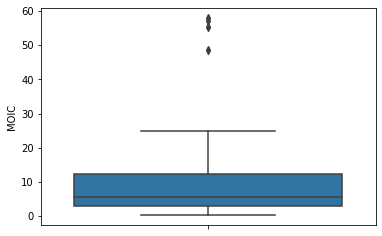

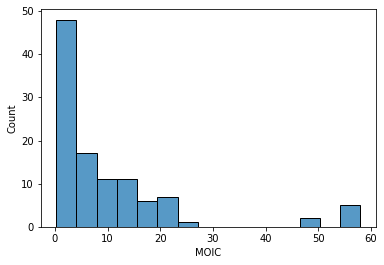

[Text(0, 0, 'Generating Revenue'),
 Text(0, 0, 'Stealth'),
 Text(0, 0, 'Generating Revenue/Not Profitable'),
 Text(0, 0, 'Startup'),
 Text(0, 0, 'Profitable')]

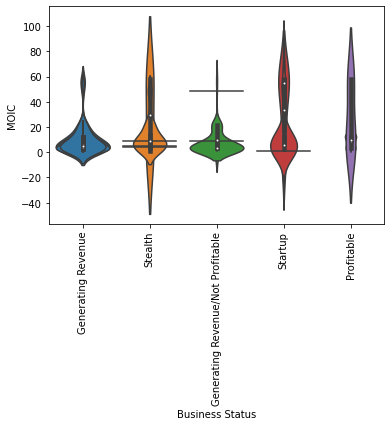

In [52]:
# check MOIC's distribution
import seaborn as sn

sn.boxplot(y=dataset["MOIC"])
plt.show()
sn.histplot(dataset, x ='MOIC')
plt.show()


# check the relationship between MOIC and Primary Industry Sector
v1 = sn.violinplot(x="Industry Sector", y="MOIC", data=dataset, size=6)
v1.set_xticklabels(v1.get_xticklabels(),rotation=90)

#Primary Industry Sector can be encoded into 2 types

# check the relationship between MOIC and Current Financing Status
v2 = sn.violinplot(x="Current Financing Status", y="MOIC", data=dataset, size=6)
v2.set_xticklabels(v2.get_xticklabels(),rotation=90)

#Current Financing Status can be encoded into 4 types

# check the relationship between MOIC and Current Business Status
v3 = sn.violinplot(x="Current Business Status", y="MOIC", data=dataset, size=6)
v3.set_xticklabels(v3.get_xticklabels(),rotation=90)

# Current Business Status can be encoded into 2 types

# check the relationship between MOIC and Universe
v4 = sn.violinplot(x="Universe", y="MOIC", data=dataset, size=6)
v4.set_xticklabels(v4.get_xticklabels(),rotation=90)

#Universe can be encoded into 4 types

# check the relationship between MOIC and VC Round
#v5 = sn.violinplot(x="VC Round", y="MOIC", data=dataset, size=6)
#v5.set_xticklabels(v5.get_xticklabels(),rotation=90)

# VC Round Status can be encoded into 2 types

# check the relationship between MOIC and Business Status
v7 = sn.violinplot(x="Business Status", y="MOIC", data=dataset, size=6)
v7.set_xticklabels(v7.get_xticklabels(),rotation=90)

#Business Status can be encoded into 3 types



In [53]:
### Assigning 0 for MOIC less than 2, 1 for 2 to 3, 3 for 3 and above

dataset['MOIC']=pd.cut(dataset.MOIC,bins=[0,2,3,1000],labels=['0','1','2'])

## Encoding categorical data

Label Encoding of Categorical Variable

In [54]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

dataset["Exit Type"]=le.fit_transform(dataset["Exit Type"])


#dataset[['Exit Type_LE']] = le.fit_transform(dataset[['Exit Type']])

dataset['Last VC Deal Type'] = le.fit_transform(dataset['Last VC Deal Type'])

dataset['Industry Sector'] = le.fit_transform(dataset['Industry Sector'])

dataset['Industry Group'] = le.fit_transform(dataset['Industry Group'])

dataset['Industry Code'] = le.fit_transform(dataset['Industry Code'])

dataset['Verticals_x'] = le.fit_transform(dataset['Verticals_x'])

dataset['City'] = le.fit_transform(dataset['City'])


dataset['Country'] = le.fit_transform(dataset['Country'])

dataset['Current Financing Status'] = le.fit_transform(dataset['Current Financing Status'])
dataset['Current Business Status'] = le.fit_transform(dataset['Current Business Status'])
dataset['Universe'] = le.fit_transform(dataset['Universe'])
dataset['Business Status'] = le.fit_transform(dataset['Business Status'])
dataset['Financing Status'] = le.fit_transform(dataset['Financing Status'])
dataset['Deal Type'] = le.fit_transform(dataset['Deal Type'])

dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Raised to Date,Deal Type,Business Status,Financing Status,Total duration for Company
3,2,1,2,1,3,2,13,9,7,1,0,7,10.10,2,0,4,8.0
17,2,6,2,1,3,9,1,20,7,1,0,7,3.30,5,4,4,6.0
18,2,6,2,1,3,9,1,20,7,1,0,7,17.80,2,0,4,6.0
19,2,6,2,1,3,9,1,20,7,1,0,7,37.80,2,0,4,6.0
21,2,12,2,1,3,2,18,19,7,1,0,0,335.00,4,0,4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,0,1,3,2,18,22,7,1,0,6,260.00,4,0,4,13.0
297,2,12,0,1,3,3,18,11,7,1,0,2,165.10,4,0,4,16.0
298,2,12,0,1,3,3,18,11,7,1,0,2,139.00,4,0,4,16.0
303,1,9,2,1,3,3,16,20,7,1,2,6,160.75,4,0,4,10.0


Changing Data type of Column to perform correlation matrix

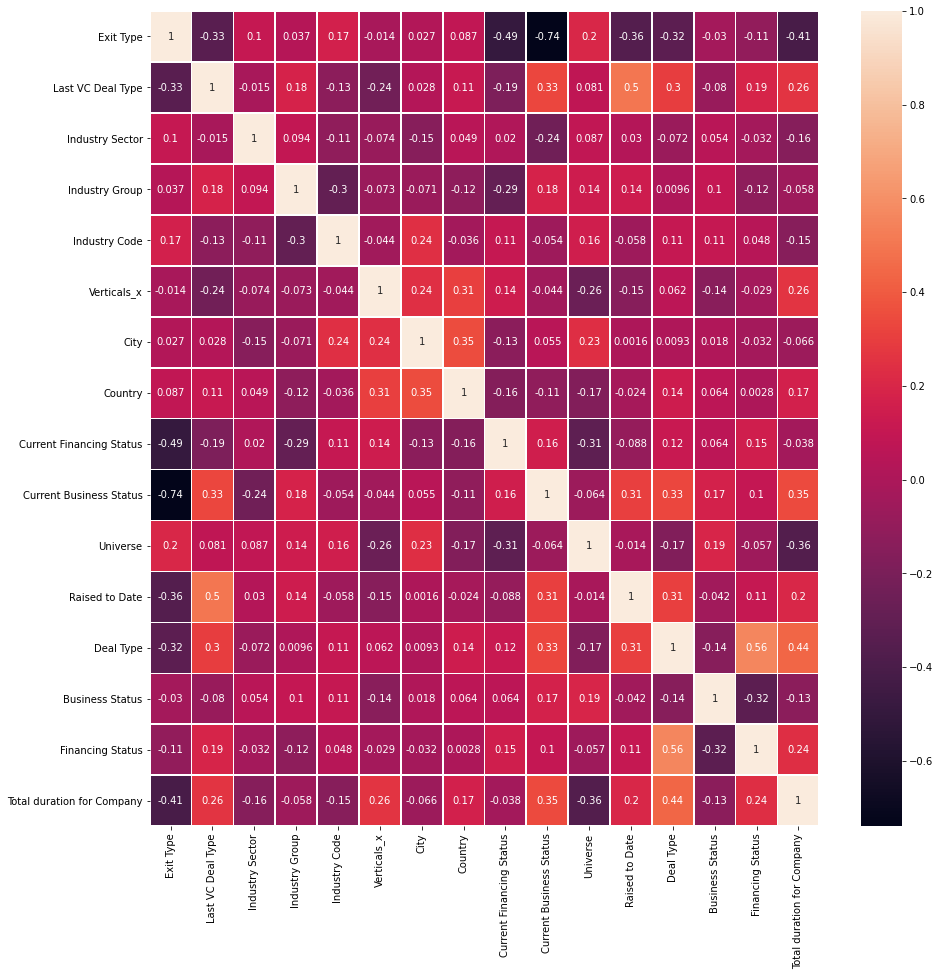

In [55]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Removal of The columns which are highly related to other columns

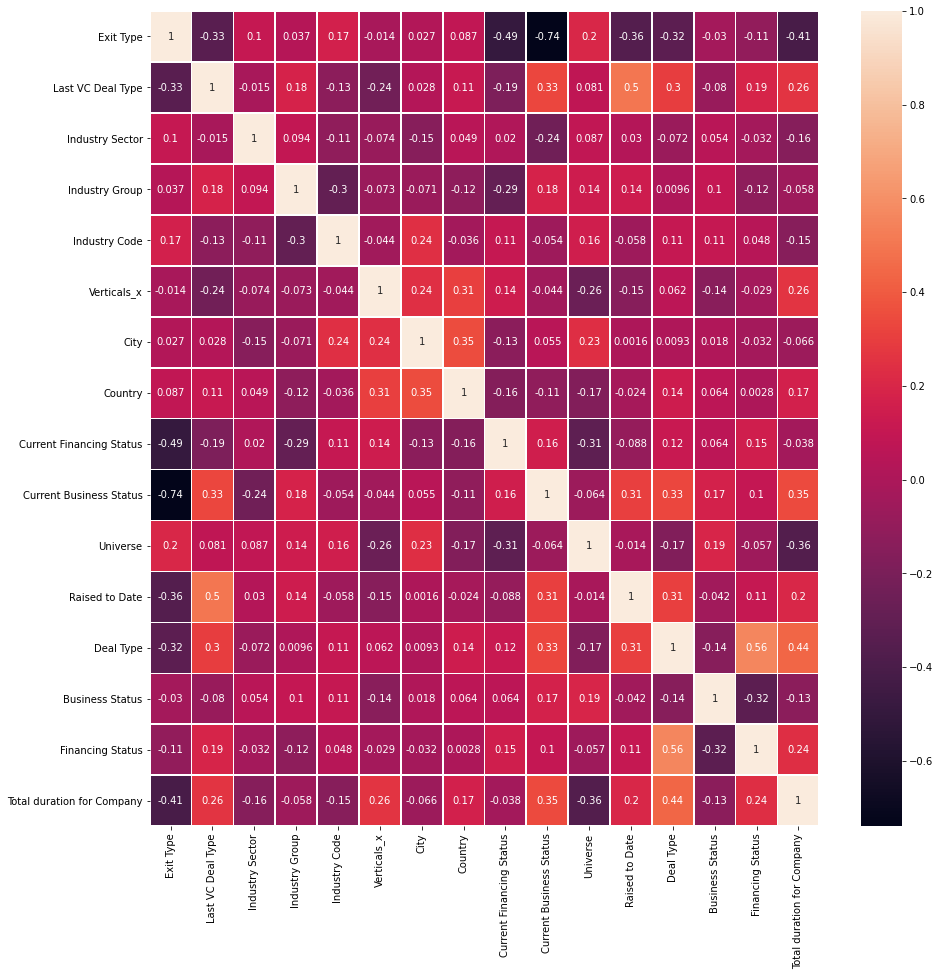

In [56]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [57]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Raised to Date,Deal Type,Business Status,Financing Status,Total duration for Company
3,2,1,2,1,3,2,13,9,7,1,0,7,10.10,2,0,4,8.0
17,2,6,2,1,3,9,1,20,7,1,0,7,3.30,5,4,4,6.0
18,2,6,2,1,3,9,1,20,7,1,0,7,17.80,2,0,4,6.0
19,2,6,2,1,3,9,1,20,7,1,0,7,37.80,2,0,4,6.0
21,2,12,2,1,3,2,18,19,7,1,0,0,335.00,4,0,4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,0,1,3,2,18,22,7,1,0,6,260.00,4,0,4,13.0
297,2,12,0,1,3,3,18,11,7,1,0,2,165.10,4,0,4,16.0
298,2,12,0,1,3,3,18,11,7,1,0,2,139.00,4,0,4,16.0
303,1,9,2,1,3,3,16,20,7,1,2,6,160.75,4,0,4,10.0


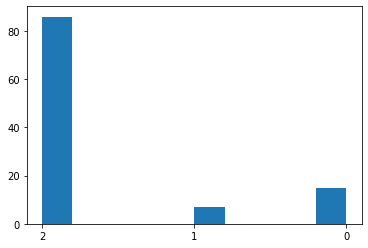

In [21]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['MOIC'])
pyplot.show()

In [22]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Raised to Date,Deal Type,Business Status,Financing Status,Total duration for Company
3,2,1,2,1,3,2,13,9,7,1,0,7,10.10,2,0,4,8.0
17,2,6,2,1,3,9,1,20,7,1,0,7,3.30,5,4,4,6.0
18,2,6,2,1,3,9,1,20,7,1,0,7,17.80,2,0,4,6.0
19,2,6,2,1,3,9,1,20,7,1,0,7,37.80,2,0,4,6.0
21,2,12,2,1,3,2,18,19,7,1,0,0,335.00,4,0,4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,0,1,3,2,18,22,7,1,0,6,260.00,4,0,4,13.0
297,2,12,0,1,3,3,18,11,7,1,0,2,165.10,4,0,4,16.0
298,2,12,0,1,3,3,18,11,7,1,0,2,139.00,4,0,4,16.0
303,1,9,2,1,3,3,16,20,7,1,2,6,160.75,4,0,4,10.0


In [58]:
X = dataset.loc[:,dataset.columns!='MOIC']
Y = dataset[['MOIC']]

In [ ]:
X

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,Country,Current Financing Status,Current Business Status,Universe,Raised to Date,Deal Type,Business Status,Financing Status,Total duration for Company
3,2,1,1,3,2,13,9,7,1,0,7,10.10,2,0,4,8.0
17,2,6,1,3,9,1,20,7,1,0,7,3.30,5,4,4,6.0
18,2,6,1,3,9,1,20,7,1,0,7,17.80,2,0,4,6.0
19,2,6,1,3,9,1,20,7,1,0,7,37.80,2,0,4,6.0
21,2,12,1,3,2,18,19,7,1,0,0,335.00,4,0,4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,1,3,2,18,22,7,1,0,6,260.00,4,0,4,13.0
297,2,12,1,3,3,18,11,7,1,0,2,165.10,4,0,4,16.0
298,2,12,1,3,3,18,11,7,1,0,2,139.00,4,0,4,16.0
303,1,9,1,3,3,16,20,7,1,2,6,160.75,4,0,4,10.0


In [ ]:
Y

,MOIC
3,2
17,2
18,2
19,2
21,2
...,...
291,0
297,0
298,0
303,2


## Splitting the dataset into the Training set and Test set

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 786,stratify=Y)

In [69]:
print(y_train)

    MOIC
148    2
94     1
212    2
31     2
126    2
..   ...
72     0
73     0
108    2
283    2
222    2

[86 rows x 1 columns]


In [70]:
print(y_test)

    MOIC
187    0
289    2
90     2
280    2
237    2
226    2
184    0
219    2
156    2
267    2
109    2
91     2
298    0
248    2
30     2
208    2
102    2
285    2
37     2
41     1
167    2
35     2


In [71]:
print(X_train)

     Exit Type  Last VC Deal Type  ...  Financing Status  Total duration for Company
148          2                  6  ...                 4                        14.0
94           2                  0  ...                 4                        10.0
212          2                  2  ...                 4                        14.0
31           2                  6  ...                 4                         8.0
126          2                  7  ...                 4                        10.0
..         ...                ...  ...               ...                         ...
72           0                  2  ...                 4                        11.0
73           0                  2  ...                 4                        11.0
108          2                  6  ...                 4                         8.0
283          1                 13  ...                 4                         9.0
222          2                  6  ...                 0         

In [72]:
print(X_test)

     Exit Type  Last VC Deal Type  ...  Financing Status  Total duration for Company
187          2                  3  ...                 4                         6.0
289          1                 13  ...                 4                        11.0
90           2                  9  ...                 4                         9.0
280          1                 12  ...                 4                        16.0
237          2                  4  ...                 0                         5.0
226          2                  6  ...                 4                         6.0
184          2                  3  ...                 4                         6.0
219          1                  9  ...                 4                        13.0
156          2                  4  ...                 4                         6.0
267          1                  9  ...                 4                        12.0
109          2                  6  ...                 4         

Defining Function for Model Performance evaluation

### Building Models

In [73]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test["MOIC"].values
    #print(f"{pr1}")
    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test.values

    pr1['Percentage error']=((pr1['Actual']-pr1['Pred'])/pr1['Actual'])*100
    print(f"{pr1}")

   
  

Random Forest

In [74]:
## defining a reusable function to evaluate model performance

def eval_result(model_name,y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y_train, y_predtrain)
    print(f'training data accuracy {train_accuracy}')
 
    
    test_accuracy = accuracy_score(y_test, y_predtest)
    print(f'testing data accuracy {test_accuracy}')
   
    
    print(classification_report(y_test,y_predtest,digits=5))
    #plot_confusion_matrix(model_name, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    #plot_roc_curve(model_name, X_test, y_test)

In [29]:
# Hyperparameter Tuning
# run once
'''''
from sklearn.ensemble import RandomForestClassifier


n_estimators_hyp = [100,200,300,400,500,700,1000]
min_sample_leaf_hyp = np.linspace(1,20, 20);

oobscore_list=dict()

for i in n_estimators_hyp:
    for j in min_sample_leaf_hyp:
        rf_model = RandomForestClassifier(n_estimators=i, min_samples_leaf=int(j), oob_score=True);
        rf_model.fit(X_train, y_train)
        key = "n_estimator =" +str(i)+" min_sample_leaf ="+str(j);
        oobscore_list[key]=rf_model.oob_score_

    #oobscore_list.append(rf_model.oob_score_)

oobscore_list

'''''''''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel

KeyboardInterrupt: ignored

In [75]:
# building model from parameters choosen from hyperparameter tuning


rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=400,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.8488


In [76]:
# Predicting results

y_predtrain = rf.predict(X_train)
y_predtest = rf.predict(X_test)

pr1=pd.DataFrame(y_predtest,columns=["Pred"])

pr1["Actual"]=y_test.values

print(f"{pr1}")


   Pred Actual
0     2      0
1     2      2
2     2      2
3     2      2
4     2      2
5     2      2
6     2      0
7     2      2
8     2      2
9     2      2
10    2      2
11    2      2
12    2      0
13    2      2
14    2      2
15    2      2
16    2      2
17    2      2
18    2      2
19    2      1
20    2      2
21    2      2


In [77]:
## evaluating model performance 

eval_result(rf,y_train,y_predtrain,y_test,y_predtest)

training data accuracy 0.9302325581395349
testing data accuracy 0.8181818181818182
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         3
           1    0.00000   0.00000   0.00000         1
           2    0.81818   1.00000   0.90000        18

    accuracy                        0.81818        22
   macro avg    0.27273   0.33333   0.30000        22
weighted avg    0.66942   0.81818   0.73636        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# get importance

# get importance
importance = rf.feature_importances_
print(importance,X.columns)


[0.03669437 0.1787081  0.         0.09492217 0.09690939 0.07591026
 0.13697599 0.08359319 0.02913166 0.01735336 0.03695601 0.06025844
 0.02036321 0.02627445 0.04350618 0.06244323] Index(['Exit Type', 'Last VC Deal Type', 'Industry Sector', 'Industry Group',
       'Industry Code', 'Verticals_x', 'City', 'Country',
       'Current Financing Status', 'Current Business Status', 'Universe',
       'Raised to Date', 'Deal Type', 'Business Status', 'Financing Status',
       'Total duration for Company'],
      dtype='object')


NameError: ignored